In [ ]:
# Download dataset 
! wget -q https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Annotations_Val_mscoco.zip
! wget -q https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Questions_Val_mscoco.zip
! wget -q http://images.cocodataset.org/zips/val2014.zip
! wget -q https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Complementary_Pairs_Val_mscoco.zip

In [ ]:
# Extract zip files
! unzip -q /content/v2_Annotations_Val_mscoco.zip
! unzip -q /content/v2_Questions_Val_mscoco.zip
! unzip -q /content/val2014.zip
! unzip -q /content/v2_Complementary_Pairs_Val_mscoco.zip

In [ ]:
# Remove the unwanted zip files
import os

for files in os.listdir('/content'):
    if files.split('.')[-1] == 'zip':
        os.remove(files)

In [ ]:
import json

# Read json files

questions = '/content/v2_OpenEnded_mscoco_val2014_questions.json'
answers = '/content/v2_mscoco_val2014_annotations.json'
comp_pairs = '/content/v2_mscoco_val2014_complementary_pairs.json'

with open(questions) as f:
	data_questions = json.load(f)
with open(answers) as f:
	data_answers = json.load(f)
with open(comp_pairs) as f:
	data_comp_pairs = json.load(f)


In [ ]:
# Sample question from json

data_questions['questions'][0]

{'image_id': 262148,
 'question': 'Where is he looking?',
 'question_id': 262148000}

In [ ]:
# Sample answer from json

data_answers['annotations'][0]['answers']

[{'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 1},
 {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 2},
 {'answer': 'at table', 'answer_confidence': 'yes', 'answer_id': 3},
 {'answer': 'skateboard', 'answer_confidence': 'yes', 'answer_id': 4},
 {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 5},
 {'answer': 'table', 'answer_confidence': 'yes', 'answer_id': 6},
 {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 7},
 {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 8},
 {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 9},
 {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 10}]

In [ ]:
import pandas as pd
import numpy as np
df_ques = pd.DataFrame([])

In [ ]:
# Fetch image id, question id and answer 
img_ids = [i['image_id'] for i in data_answers['annotations']]
ques_ids = [i['question_id'] for i in data_answers['annotations']]
ans = [i['answers'][0]['answer'] for i in data_answers['annotations']]

In [ ]:
# Check if size is correct

len(ans)

214354

In [ ]:
len(ques_ids)

214354

In [ ]:
len(img_ids)

214354

In [ ]:
# Creating dataframe for answers data

data_ans = {'image_id': img_ids, 'ques_id': ques_ids, 'ans': ans}
df_ans = pd.DataFrame(data_ans)

df_ans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214354 entries, 0 to 214353
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   image_id  214354 non-null  int64 
 1   ques_id   214354 non-null  int64 
 2   ans       214354 non-null  object
dtypes: int64(2), object(1)
memory usage: 4.9+ MB


In [ ]:
# Creating dataframe for questions data

ques_ids = [i['question_id'] for i in data_questions['questions']]
ques = [i['question'] for i in data_questions['questions']]

data_ques = {'ques_id': ques_ids, 'ques': ques}
df_ques = pd.DataFrame(data_ques)

df_ques.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214354 entries, 0 to 214353
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ques_id  214354 non-null  int64 
 1   ques     214354 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.3+ MB


In [ ]:
# Inner join questions and answers dataframe
df = df_ans.join(df_ques.set_index('ques_id'), on='ques_id', how='inner')
df.sample(10)

,image_id,ques_id,ans,ques
26077,111609,111609002,yes,Is the man sleeping?
64392,35897,35897023,united states,What country is this in?
10434,136595,136595000,red,What color is the bridge?
71510,334311,334311005,no,Is anyone sitting at the bench?
104332,555843,555843003,birds,What animals are these?
157257,93746,93746002,no,Does the man have any hair on top of his head?
32788,411303,411303000,no,Are people eating?
74233,565650,565650001,moped,What is the vehicle covered by the purple umbr...
33841,411941,411941004,tile,What type of flooring does this room have?
148657,87920,87920006,phone,What's is the woman hand?


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214354 entries, 0 to 214353
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   image_id  214354 non-null  int64 
 1   ques_id   214354 non-null  int64 
 2   ans       214354 non-null  object
 3   ques      214354 non-null  object
dtypes: int64(2), object(2)
memory usage: 8.2+ MB


In [ ]:
def rename_images(image_path):
    for img in os.listdir(image_path):
        img_path = os.path.join(image_path, img)
        img_id = int(img_path.split('_')[-1].split('.')[0])
        os.rename(img_path, os.path.join(image_path, str(img_id)))
image_path = '/content/val2014'
rename_images(image_path)

                                               ques      ans
192235               What kind of building is this?  airport
192236        Is there anyone else in the building?       no
192237  Does this luggage all belong to one person?      yes
192238                  What is the man sitting on?     cart
192239                     Are they going shopping?       no


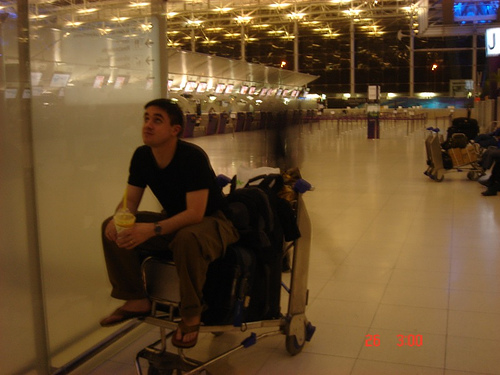

In [ ]:
from IPython.display import display
from PIL import Image

# Display example of random sample


def display_example(image_path, idx=None):

    if idx == None:
        idx = np.random.randint(0, len(os.listdir(image_path)))

    image_path = os.path.join(image_path, os.listdir(image_path)[idx])
    image_id = int(image_path.split('/')[-1])
    image = Image.open(image_path)
    print(df[df['image_id'] == image_id][['ques', 'ans']])
    display(image)

# 6181
display_example(image_path, idx = 6184)

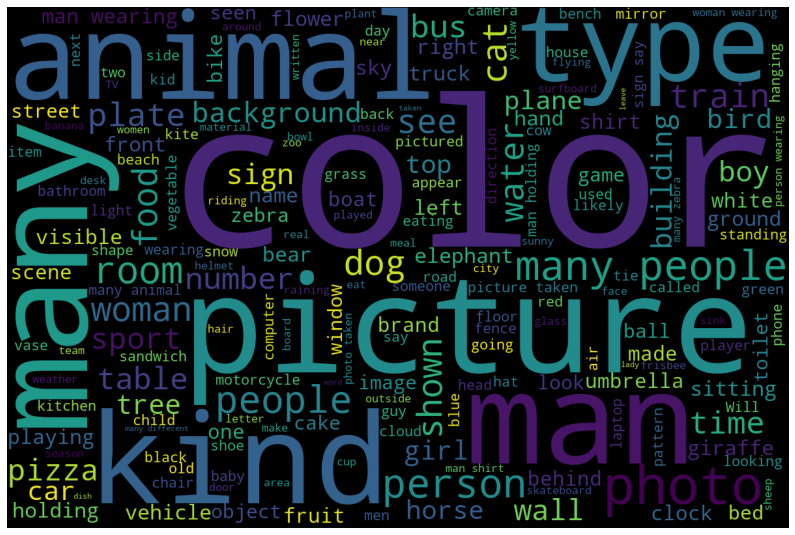

In [ ]:
# EDA
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# WordCloud of questions
text = " ".join(q for q in df.ques)
stopwords = set(STOPWORDS)
wordcl = WordCloud(stopwords = stopwords, background_color='black', width = 1200, height = 800).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl)
plt.axis('off')
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Question words length boxplot')

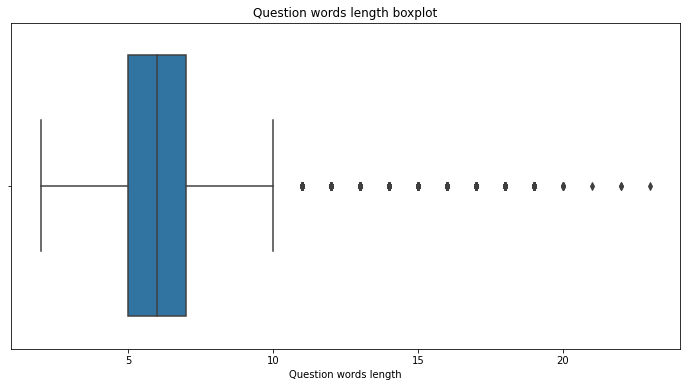

In [ ]:
# Questions length

words_count = df.ques.str.split().apply(len)

plt.figure(figsize=(12, 6))
sns.boxplot(words_count)

plt.xlabel('Question words length')
plt.title('Question words length boxplot')

Text(0.5, 1.0, 'Most frequent answers')

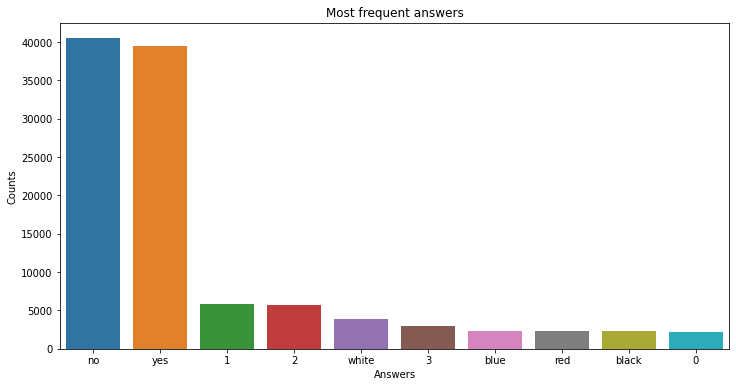

In [ ]:
# Most frequent answers

ans_most_freq = dict(df.ans.value_counts())
ans_val = list(ans_most_freq.keys())
ans_count = list(ans_most_freq.values())

plt.figure(figsize=(12, 6))
sns.barplot(x = ans_val[0:10], y = ans_count[0:10])
plt.xticks(rotation=0)
plt.xlabel('Answers')
plt.ylabel('Counts')
plt.title('Most frequent answers')

Text(0.5, 1.0, 'Answer words length count')

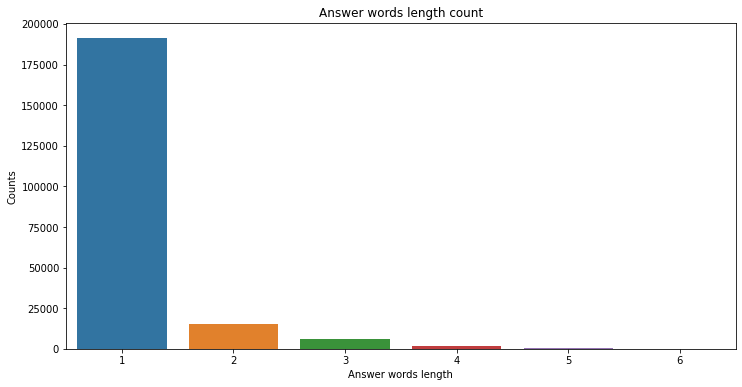

In [ ]:
# Answers length

words_count_dict = dict(df.ans.str.split().apply(len).value_counts())
words_len = list(words_count_dict.keys())
words_count = list(words_count_dict.values())

plt.figure(figsize=(12, 6))
sns.barplot(x = words_len[0:6], y = words_count[0:6])
plt.xticks(rotation=0)
plt.xlabel('Answer words length')
plt.ylabel('Counts')
plt.title('Answer words length count')

In [ ]:
# Keep only answers having one word
df = df[df.ans.apply(lambda x: len(x.split())== 1)]

In [ ]:
# Select top 100 classes or answers

from tqdm import tqdm

no_classes = 100
classes = df.ans.value_counts()[:no_classes].index
df = df[df.ans.isin(classes)].sample(50000)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 212413 to 204851
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  50000 non-null  int64 
 1   ques_id   50000 non-null  int64 
 2   ans       50000 non-null  object
 3   ques      50000 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.9+ MB


In [ ]:
# Adding image_path column
img_path = '/content/val2014'
df['image_path'] = df.image_id.apply(lambda x: os.path.join(img_path, str(x)))
df.sample(5)

,image_id,ques_id,ans,ques,image_path
199028,383039,383039002,grass,What are the animals eating?,/content/val2014/383039
32760,18073,18073003,no,Are there trees in the background?,/content/val2014/18073
170074,363991,363991009,no,Is the ground grasses?,/content/val2014/363991
170977,233528,233528003,2,How many computers are here?,/content/val2014/233528
116644,328596,328596011,no,Is this a Chicago-style pizza?,/content/val2014/328596


In [ ]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['image_path', 'ques']], df.ans, test_size=0.2, random_state=77)

In [ ]:
# One hot encoding labels

from sklearn.preprocessing import OneHotEncoder
def ans_encoding(cls):

    enc = OneHotEncoder(handle_unknown='ignore')
    y = cls.values.reshape(-1,1)
    enc.fit(y)
    y = enc.transform(y).toarray()
    return y

In [ ]:
!wget -q https://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

if 'glove.6B.zip' in os.listdir('/content'):
    import os
    os.remove('glove.6B.zip')

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

# Document to tokenization with padding
def ques_tokenization(docs):
    max_length = 20
    t = Tokenizer()
    t.fit_on_texts(docs)
    vocab_size = len(t.word_index) + 1
    encoded_text = t.texts_to_sequences(docs)
    padded_text = pad_sequences(encoded_text, maxlen=max_length) 
    return padded_text, t

# Word embeddings matrix preparation
def prepare_embeddings(X_train):
    emd_dim = 50
    glove_path = '/content/glove.6B.50d.txt'
    embeddings_index = {}

    _, t = ques_tokenization(X_train['ques'])
    vocab_size = len(t.word_index) + 1

    with open(glove_path, 'r') as glove_file:
        for line in glove_file:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs    

    embedding_matrix = np.zeros((vocab_size, emd_dim))        
    for word, i in t.word_index.items():
        if word in embeddings_index.keys():
            embedding_vector = embeddings_index[word]
            embedding_matrix[i] = embedding_vector

    return embedding_matrix, vocab_size
emd_matrix, vocab_size = prepare_embeddings(X_train)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Dropout, BatchNormalization, Rescaling, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Embedding, LSTM, Concatenate, multiply, Reshape
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.models import load_model

import warnings
warnings.filterwarnings("ignore")


# from tensorflow.keras.applications.vgg16 import VGG16
# from tensorflow.keras.applications.vgg16 import preprocess_input
# model = VGG16(weights='imagenet')
# feature_model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

from tensorflow.keras.applications.efficientnet import EfficientNetB0

model = EfficientNetB0(weights="imagenet")
feature_model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
input_layer_units = 1280 # For efficient net, second last layer has 1280 output

# Read image file and pass to the feature model
def img_preprocessing(filename, ques):

    image_file = tf.io.read_file(filename)
    img = tf.image.decode_jpeg(image_file, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32) # [0, 1]
    img = tf.image.resize(img, [224, 224])
    img = tf.reshape(img, (1, img.shape[0], img.shape[1], img.shape[2]))
    img = feature_model(img)
    img = tf.squeeze(img)

    return img, ques

# Create tensorflow dataset pipeline 
def dataset_pipeline(X, y, bs=512):
    img_files = tf.convert_to_tensor(list(X.image_path.values))
    ques, _ = ques_tokenization(list(X.ques.values))
    ques  = tf.convert_to_tensor(ques)
    ans = tf.convert_to_tensor(ans_encoding(y))

    ds = tf.data.Dataset.from_tensor_slices((img_files, ques)).map(img_preprocessing)
    ans_ds = tf.data.Dataset.from_tensor_slices(ans)
    ds = tf.data.Dataset.zip((ds, ans_ds)).batch(bs).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return ds

bs = 512
train_ds = dataset_pipeline(X_train, y_train, bs)
test_ds = dataset_pipeline(X_test, y_test, bs)

21834768/21834768 [==============================] - 1s 0us/step


In [ ]:
# for i in train_ds.take(1):
#     print(i[0][0].numpy().shape)

In [ ]:
# Create text model
def ques_model(emd_matrix, vocab_size, emd_dim, length_seq, dropout):
    print("Creating text model")
    ques_input = Input(shape=(length_seq,))
    e = Embedding(vocab_size, emd_dim, 
        weights=[emd_matrix], trainable=False)(ques_input)
    l1 = LSTM(units=64, return_sequences=True)(e)
    d1 = Dropout(dropout)(l1)
    l2 = LSTM(units=64, return_sequences=False)(d1)
    d2 = Dropout(dropout)(l2)
    q_model = Dense(1024, activation='tanh')(d2)
    q_model= Model(inputs=ques_input, outputs=q_model)
    return ques_input, q_model

In [ ]:
# Create image model
def img_model(dropout):
    print("Creating image model")
    input = Input(shape=(input_layer_units, ))
    im_model = Dense(1024, activation='relu')(input)
    im_model = Model(inputs=input, outputs=im_model)
    return input, im_model

In [ ]:
# Combine text and image model with point wise multiplication
def vqa_model(embedding_matrix, vocab_size, emd_dim, length_seq, dropout, no_classes):
    i1, img = img_model(dropout)
    i2, text = ques_model(embedding_matrix, vocab_size, emd_dim, length_seq, dropout)

    print("Merging both text and image models")
    input_model = multiply([img.layers[-1].output, text.layers[-1].output]) 

    m = BatchNormalization()(input_model)
    m = Dropout(dropout)(m)
    m = Dense(1000, activation='relu')(m)
    output = Dense(no_classes, activation='softmax')(m)

    model = Model(inputs = [i1, i2], outputs = output)
    print(model.summary())
    return model

In [ ]:
# vocab_size = 6251
emd_dim = 50
max_len = 20
dropout = 0.1
no_classes = 100

model = vqa_model(emd_matrix, vocab_size, emd_dim, max_len, dropout, no_classes)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


Creating image model
Creating text model
Merging both text and image models
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 20, 50)       317600      ['input_3[0][0]']                
                                                                                                  
 lstm (LSTM)                    (None, 20, 64)       29440       ['embedding[0][0]']              
                                                                                                  
 dropout (Dropout)              (None, 20, 64)       0           ['lstm[0][0]']                   
                

In [ ]:
# Define callbacks

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from tensorflow import math

# Model checkpoint
logs_directory = 'model/logs/'
checkpoint = ModelCheckpoint(
    r"model/model_checkpoint",
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    mode="auto",
    period=1,
)

# ReduceLR = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, min_lr=3e-4)
# Function for exponential learning rate decay after 5 epochs
def scheduler(epoch, lr):
  decay = -0.1
  if epoch < 5:
    return lr
  else:
    return lr * math.exp((epoch+1)*decay)

lrscheduler = LearningRateScheduler(scheduler)

# Early stopping if val_loss does not decrease for 3 epochs
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience = 3, restore_best_weights=True)

callbacks = [checkpoint, lrscheduler, early_stopping_monitor]

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(train_ds, epochs=10, \
                    validation_data=test_ds,
                    callbacks= callbacks)

Epoch 1/10
79/79 [==============================] - ETA: 0s - loss: 2.1242 - accuracy: 0.3314 

79/79 [==============================] - 3511s 44s/step - loss: 2.1242 - accuracy: 0.3314 - val_loss: 2.9631 - val_accuracy: 0.2952 - lr: 0.0010
Epoch 2/10


# Rough

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot, Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

# define documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.',
        'this not gone']
# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0, 1])

In [ ]:
# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

[[31, 40], [48, 28], [2, 25], [14, 28], [12], [7], [38, 25], [21, 48], [38, 28], [23, 37, 40, 12], [36, 21, 43]]


In [ ]:
# pad documents to a max length of 4 words
max_length = 5
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[31 40  0  0  0]
 [48 28  0  0  0]
 [ 2 25  0  0  0]
 [14 28  0  0  0]
 [12  0  0  0  0]
 [ 7  0  0  0  0]
 [38 25  0  0  0]
 [21 48  0  0  0]
 [38 28  0  0  0]
 [23 37 40 12  0]
 [36 21 43  0  0]]


In [ ]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 5, 8)              400       
                                                                 
 flatten_3 (Flatten)         (None, 40)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________
None
Accuracy: 72.727275


In [ ]:
# define documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']
# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1
# # integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]
[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten

# The CNN
im_input = Input(shape=(64, 64, 1))
x1 = Conv2D(8, 3, padding='same')(im_input)
x1 = MaxPooling2D()(x1)
x1 = Conv2D(16, 3, padding='same')(x1)
x1 = MaxPooling2D()(x1)
x1 = Flatten()(x1)
# Add a final fully-connected layer after the CNN for good measure
x1 = Dense(32, activation='tanh')(x1)

x1.shape

TensorShape([None, 32])

In [ ]:
x1

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_36')>

In [ ]:
from tensorflow.keras import initializers
max_length=20
#IMAGE MODEL
im_input = Input(shape=(4096,), name = "im_input")
#flat = Flatten()(im_input)
image_model=Dense(1024,activation='relu',kernel_initializer=initializers.he_normal(seed=42))(im_input)
image_model=Model(inputs=im_input,outputs=image_model)
# image_model.summary()
#QUESTION MODEL
from tensorflow.python.keras.layers import LSTM
ques_input = Input(shape=(max_length,), name = "ques_input")
e1 =Embedding(vocab_size, 50, weights=[emd_matrix], input_length=max_length,trainable=False)(ques_input)
l1= LSTM(64,kernel_initializer=initializers.he_normal(seed=42),return_sequences=True)(e1)
l2= LSTM(64,kernel_initializer=initializers.he_normal(seed=42),return_sequences=True)(l1)
#l1= LeakyReLU(alpha = 0.3)(l1)
f1= Flatten(name='flatten_1')(l2)
question_model=Dense(1024,activation='relu',kernel_initializer=initializers.he_normal(seed=42))(f1)
question_model = Model(inputs=ques_input, outputs=question_model)
# question_model.summary()
#COMBINING FEATURES AND MAKING FINAL MODEL FOR PREDICTION
from tensorflow.keras.layers import multiply
input_model=multiply([image_model.layers[-1].output,question_model.layers[-1].output])
d1=BatchNormalization()(input_model)
d1 = Dropout(0.5)(d1)
d1=Dense(1000,activation='relu',kernel_initializer=initializers.he_normal(seed=42))(d1)
final_output = Dense(2, kernel_initializer=initializers.he_normal(seed=42),activation='softmax')(d1)
final_model = Model(inputs=[im_input,ques_input], outputs=final_output)
print(final_model.summary())

  <tf.Variable 'lstm_2/lstm_cell_2/recurrent_kernel:0' shape=(64, 256) dtype=float32>
  <tf.Variable 'lstm_2/lstm_cell_2/bias:0' shape=(256,) dtype=float32>. This is a strong indication that the Lambda layer should be rewritten as a subclassed Layer.
  <tf.Variable 'lstm_3/lstm_cell_3/recurrent_kernel:0' shape=(64, 256) dtype=float32>
  <tf.Variable 'lstm_3/lstm_cell_3/bias:0' shape=(256,) dtype=float32>. This is a strong indication that the Lambda layer should be rewritten as a subclassed Layer.


Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 ques_input (InputLayer)        [(None, 20)]         0           []                               
                                                                                                  
 embedding_38 (Embedding)       (None, 20, 50)       317300      ['ques_input[0][0]']             
                                                                                                  
 tf.compat.v1.shape_4 (TFOpLamb  (3,)                0           ['embedding_38[0][0]']           
 da)                                                                                              
                                                                                                  
 tf.__operators__.getitem_4 (Sl  ()                  0           ['tf.compat.v1.shape_4[0][